In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('smoke_detection_iot.csv')

In [3]:
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [5]:
# corr = data.corr()
# plt.figure(figsize=(10, 8), dpi=200)
# sns.heatmap(corr, annot=True, fmt=".3f", cmap='coolwarm',
#             xticklabels=corr.columns, yticklabels=corr.columns,
#             linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 6})
# plt.xticks(ha="right", fontsize=8)
# plt.yticks(fontsize=8)
# plt.tight_layout()
# plt.show()

In [6]:
correlation_matrix = data.corr()
fire_alarm_correlations = correlation_matrix['Fire Alarm']
sorted_correlations = fire_alarm_correlations.sort_values(ascending=False)
print(sorted_correlations)

Fire Alarm        1.000000
CNT               0.673762
Humidity[%]       0.399846
Pressure[hPa]     0.249797
Raw H2            0.107007
NC2.5            -0.057707
NC1.0            -0.082828
PM2.5            -0.084916
eCO2[ppm]        -0.097006
PM1.0            -0.110552
NC0.5            -0.128118
Temperature[C]   -0.163902
TVOC[ppb]        -0.214743
Raw Ethanol      -0.340652
Unnamed: 0       -0.361351
UTC              -0.389404
Name: Fire Alarm, dtype: float64


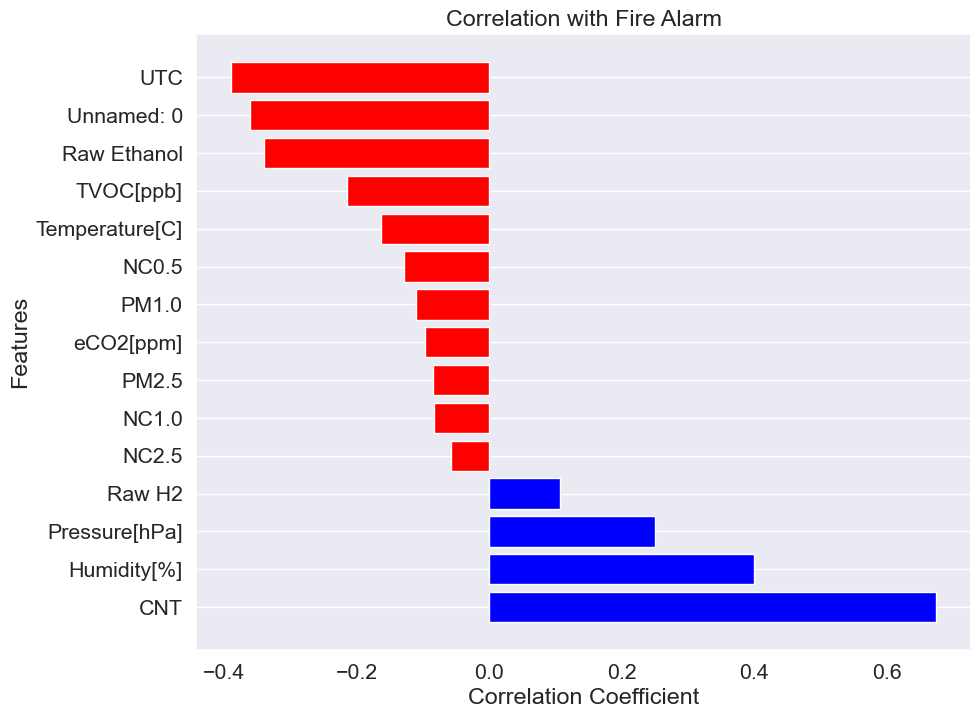

In [25]:
plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'blue' for x in sorted_correlations.values]
barplot = plt.barh(sorted_correlations.index, sorted_correlations.values, color=colors)
plt.title('Correlation with Fire Alarm')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()


<Axes: xlabel='Fire Alarm', ylabel='count'>

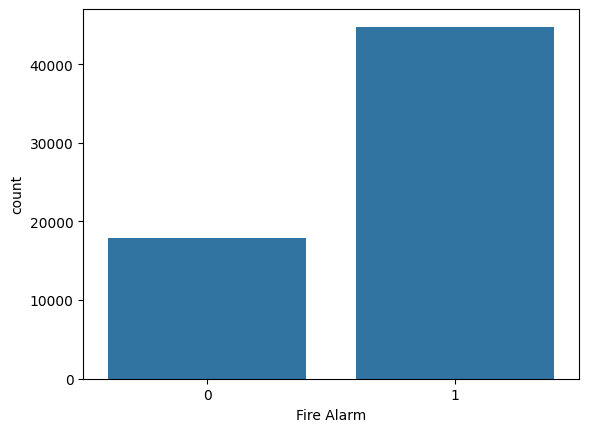

In [7]:
# Cheking if labeling of the data is balanced
sns.countplot(x='Fire Alarm', data=data)

In [8]:
print(data.columns.to_list())

['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm']


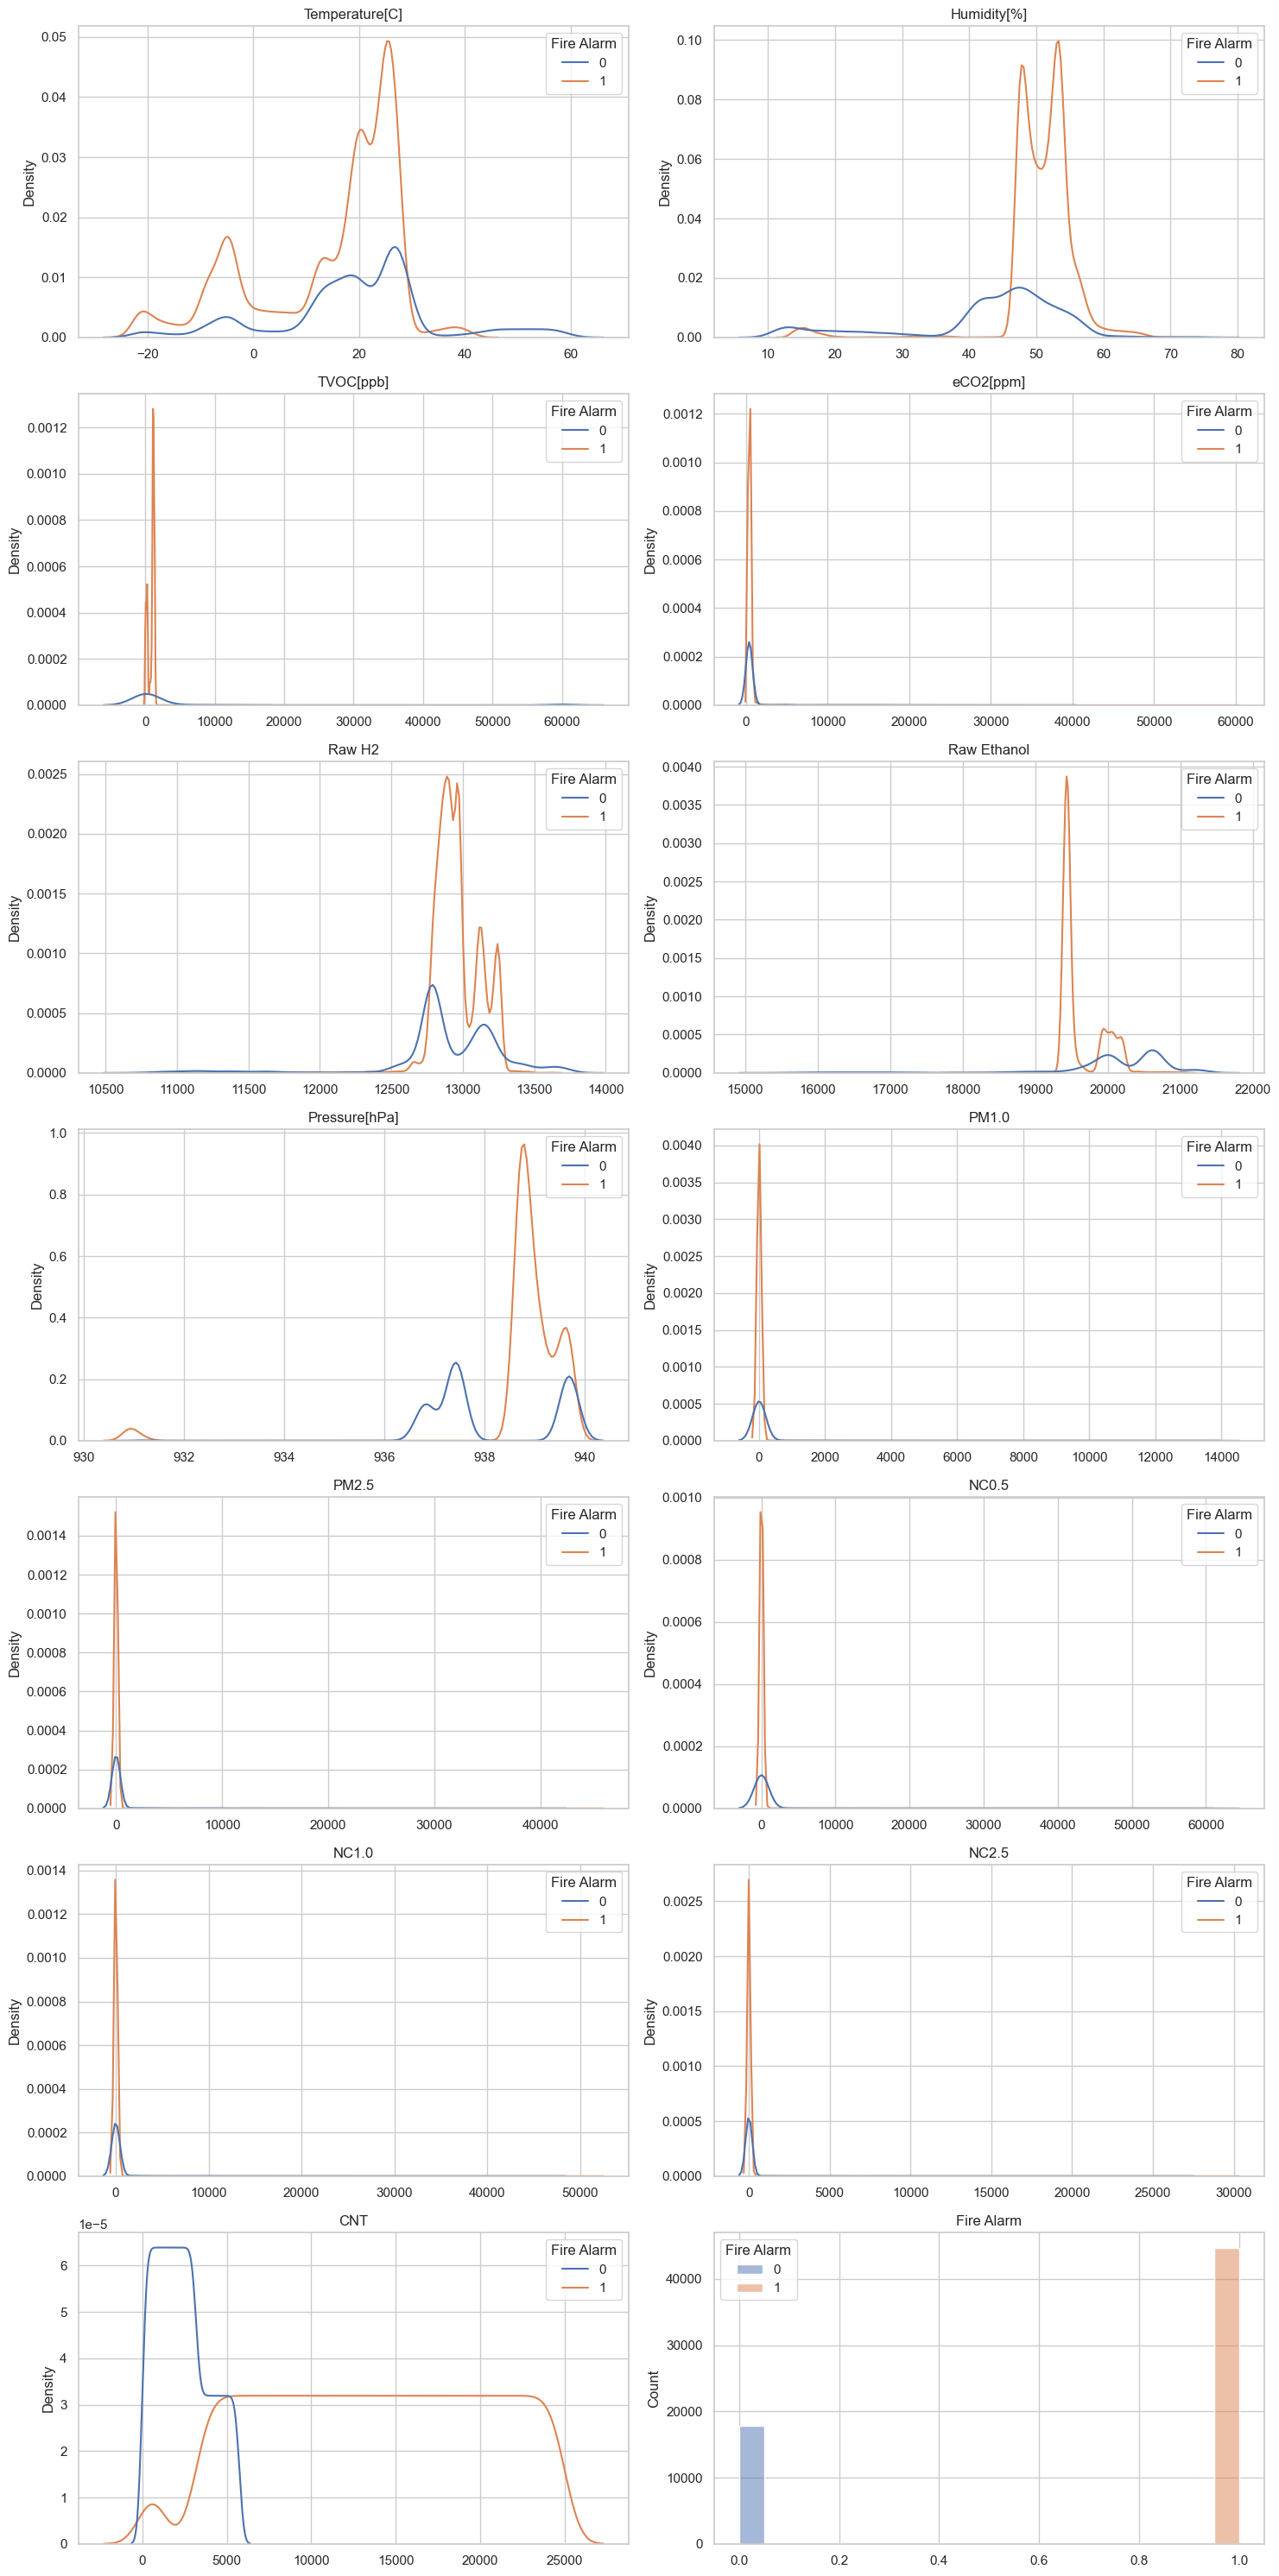

In [9]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(7, 2, figsize=(15, 30))
axes = axes.flatten()
data_columns = data[['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm']]
for i, col in enumerate(data_columns.columns):
    ax = axes[i]
    if col in ['Fire Alarm']:
        sns.histplot(data=data_columns, x=col, hue='Fire Alarm', ax=ax, kde=True)
    else:
        sns.kdeplot(data=data_columns, x=col, hue='Fire Alarm', ax=ax)
    ax.set_title(col) 
    ax.set_xlabel('')
plt.tight_layout()
plt.show()
plt.close(fig)

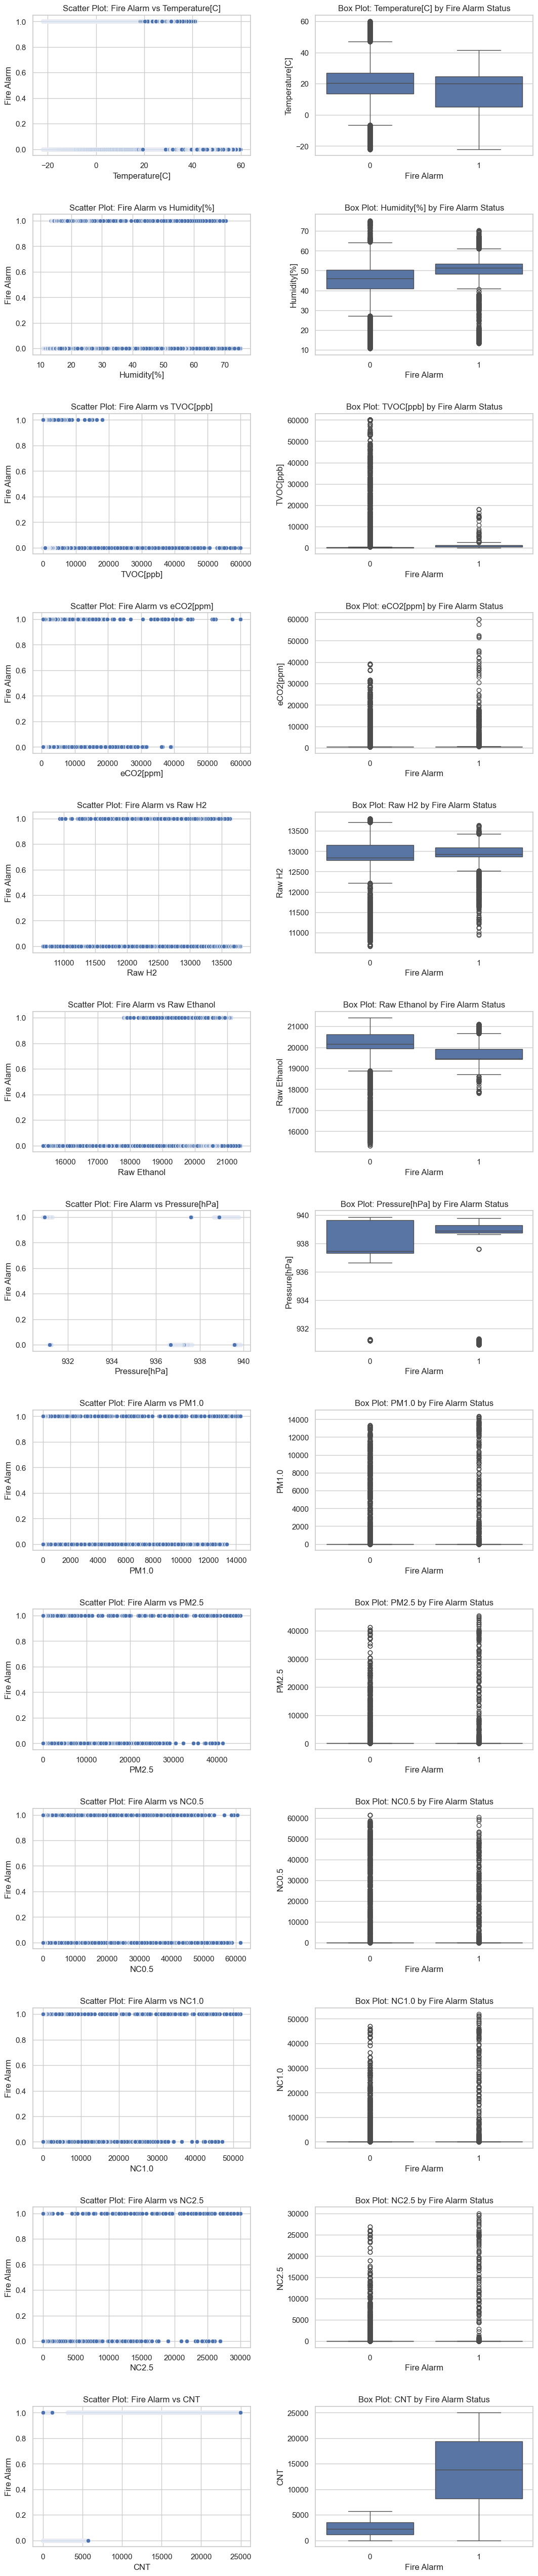

In [10]:
features_to_plot = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT'] 
n_features = len(features_to_plot)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=n_features, ncols=2, figsize=(12, n_features * 4))
fig.tight_layout(pad=5.0)

# Iterate over the features and create plots
for i, feature in enumerate(features_to_plot):
    # Scatter plot on the left
    sns.scatterplot(ax=axes[i, 0], data=data, x=feature, y='Fire Alarm')
    axes[i, 0].set_title(f'Scatter Plot: Fire Alarm vs {feature}')

    # Box plot on the right
    sns.boxplot(ax=axes[i, 1], x='Fire Alarm', y=feature, data=data)
    axes[i, 1].set_title(f'Box Plot: {feature} by Fire Alarm Status')

plt.show()


## Data Preprocessing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data.drop('Fire Alarm', axis=1).values
# # After trying 5 collections of hyperparameters and getting zero improvement, returned to preprocessing and removed features, that have weak correlation to diabetes
# X = data[['Age', 'HighChol', 'BMI', 'HeartDiseaseorAttack',
#        'PhysActivity', 'GenHlth', 'MentHlth', 'DiffWalk','PhysHlth', 'Stroke', 'HighBP']].values
y = data['Fire Alarm'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Create Model

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [16]:
X_train.shape

(41962, 15)

In [17]:
model = Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))
    
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])


## Train Model

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=True)
model.fit(x=X_train, y=y_train, epochs=100, batch_size=128, callbacks=[early_stopping], validation_data=(X_test, y_test))

Epoch 1/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8070 - loss: 0.4009 - val_accuracy: 0.9978 - val_loss: 0.0078
Epoch 2/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0301 - val_accuracy: 0.9992 - val_loss: 0.0039
Epoch 3/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9961 - loss: 0.0177 - val_accuracy: 0.9980 - val_loss: 0.0054
Epoch 4/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9960 - loss: 0.0175 - val_accuracy: 0.9992 - val_loss: 0.0031
Epoch 5/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9975 - loss: 0.0156 - val_accuracy: 0.9938 - val_loss: 0.0177
Epoch 6/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9965 - loss: 0.0153 - val_accuracy: 0.9997 - val_loss: 0.0028
Epoch 7/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9978 - loss: 0.0106 - val_accuracy: 0.9996 - val_loss: 0.0027
Epoch 8/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9989 - loss: 0.0079 - val_accu

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,173 (153.02 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,116 (102.02 KB)

<Axes: >

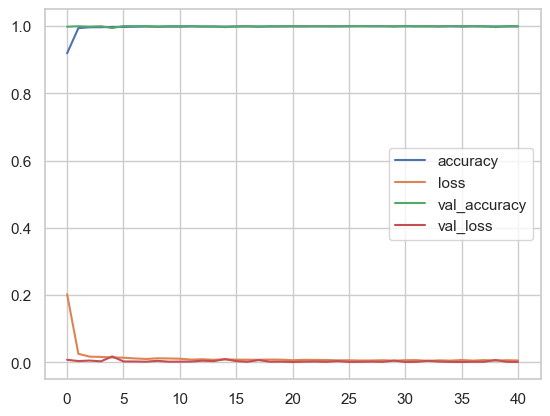

In [20]:
loses = pd.DataFrame(model.history.history)
loses.plot()

In [21]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict probabilities
probabilities = model.predict(X_test)

# Convert probabilities to class labels
predictions = (probabilities > 0.5).astype(int)

# Generate classification report
print(classification_report(y_test, predictions))


646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5916
           1       1.00      1.00      1.00     14752

    accuracy                           1.00     20668
   macro avg       1.00      1.00      1.00     20668
weighted avg       1.00      1.00      1.00     20668



In [22]:
cm = confusion_matrix(y_test, predictions)
cm

array([[ 5912,     4],
       [    1, 14751]], dtype=int64)

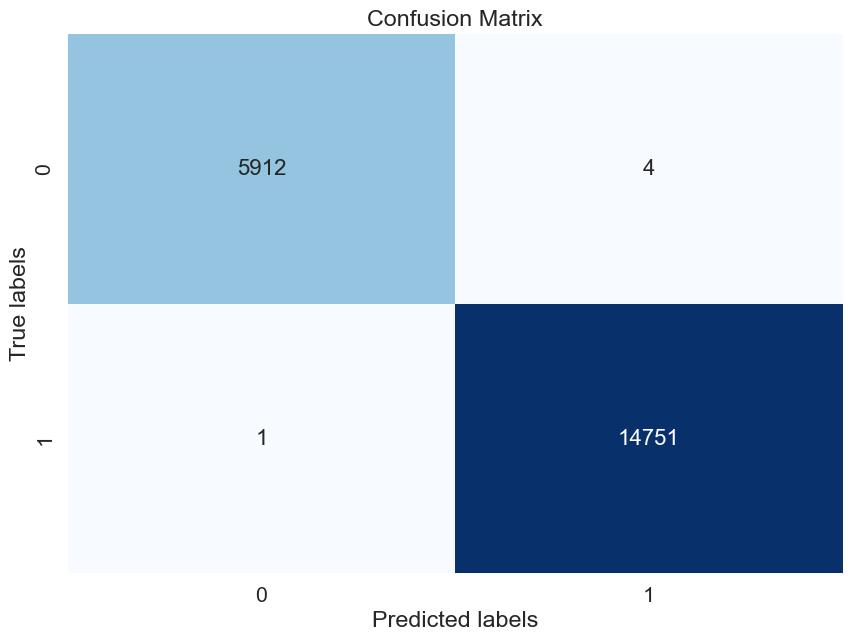

In [23]:
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()